In [110]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
import sklearn as svm
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler , StandardScaler, RobustScaler, PolynomialFeatures

In [111]:
df = pd.read_csv("a_nettoyer.csv")

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 90 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [113]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
21608    False
21609    False
21610    False
21611    False
21612    False
Length: 21613, dtype: bool

<AxesSubplot: >

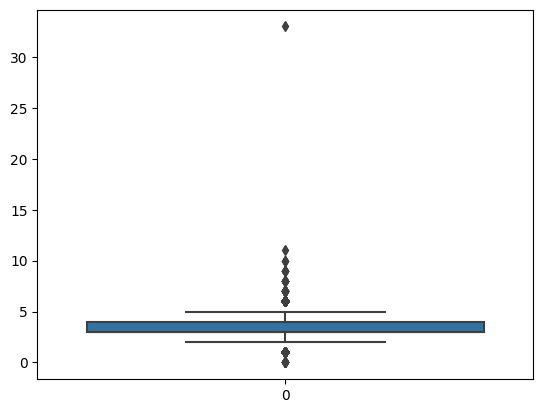

In [114]:
sns.boxplot(df['bedrooms'])

In [115]:
a_supprimer = df[df['bedrooms'] >= 20].index
df.drop(a_supprimer)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,0,0,0,0,0,0,0,0,0,0
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,1,0,0,0,0,0,0,0,0,0
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [116]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,0,0,0,0,0,0,0,0,0,0
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,1,0,0,0,0,0,0,0,0,0
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot: >

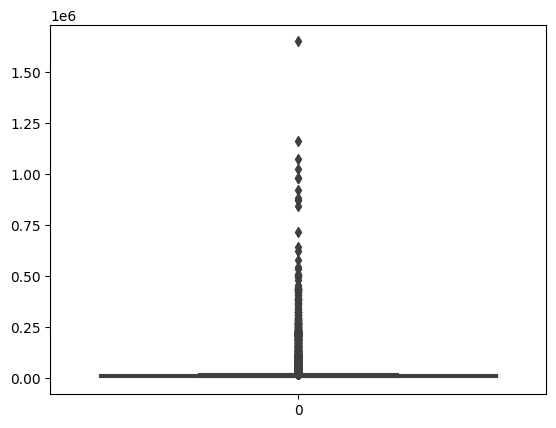

In [117]:
sns.boxplot(df['sqft_lot'])

In [118]:
df = df.drop("id", axis= 1)

In [119]:
df = df.drop("date", axis=1)

In [120]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,0
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,...,1,0,0,0,0,0,0,0,0,0
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,...,0,0,0,0,0,0,0,0,0,0
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,0


In [121]:
df = df.drop("lat", axis= 1)

In [122]:
df = df.drop("long", axis= 1)

In [123]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,0
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,...,1,0,0,0,0,0,0,0,0,0
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,...,0,0,0,0,0,0,0,0,0,0
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,0


In [128]:
pd.options.display.max_rows = 150
pd.options.display.max_columns = 150

In [129]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,1986.552492,12768.455652,0.016749,0.009207,0.012955,0.014667,0.007773,0.023042,0.006524,0.013094,0.004627,0.009022,0.005737,0.008791,0.010827,0.023088,0.003748,0.019063,0.013094,0.014852,0.011845,0.012678,0.005784,0.019988,0.025216,0.027298,0.002313,0.013048,0.025355,0.010225,0.026558,0.018739,0.012400,0.018785,0.021052,0.021654,0.014343,0.005460,0.012631,0.020404,0.016610,0.009161,0.016240,0.004858,0.027854,0.010595,0.015500,0.012307,0.008606,0.005043,0.012446,0.026975,0.015269,0.025586,0.023504,0.008513,0.013418,0.018970,0.016379,0.022857,0.012169,0.015870,0.013325,0.002637,0.020636,0.011752,0.012446,0.011798,0.012122,0.006293,0.012955,0.014667
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,685.391304,27304.179631,0.128333,0.095515,0.113084,0.120219,0.087824,0.150039,0.080508,0.113680,0.067865,0.094559,0.075529,0.093349,0.103490,0.150186,0.061105,0.136748,0.113680,0.120964,0.108189,0.111881,0.075831,0.139962,0.156785,0.162955,0.048043,0.113482,0.157205,0.100604,0.160792,0.135604,0.110665,0.135768,0.143562,0.145553,0.118904,0.073689,0.111680,0.141382,0.127809,0.095277,0.126401,0.069533,0.164557,0.102390,0.123533,0.110257,0.092370,0.070838,0.110869,0.162013,0.122622,0.157902,0.151502,0.091877,0.115058,0.136422,0.126931,0.149450,0.109641,0.124976,0.114666,0.051288,0.142165,0.107771,0.110869,0.107981,0.109435,0.079077,0.113084,0.120219
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,399.000000,651.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [124]:
df.to_csv ("nettoyer.csv" , index=False)